In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import Sequential
from keras.layers import Embedding, Conv1D, BatchNormalization, Flatten, Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn import metrics

from dataUtils import DataUtils
from model_utils import ModelUtils

Using TensorFlow backend.


### QY classification (binary) IMPORTANT because need to justify if emission exists!

In [15]:
data = pd.read_csv('cleaned_data_emission.tsv', sep='\t')

In [16]:
X, qy = DataUtils.get_xy(data.values, 9,4)

In [17]:
uniform_length = DataUtils.get_max_len(X) + 5

In [18]:
uniform_length ##set as constant

279

In [19]:
data = data[data['Quantum Yield'].notna()]

In [20]:
X, qy = DataUtils.get_xy(data.values, 9,4)

In [21]:
word_map=DataUtils.load_wordmap_from_json('smiles_wordmap.json')
X_numeric = DataUtils.numeric_encoding(x_list=X, word_map=word_map, uniform_length=uniform_length)

In [22]:
X_train, X_test, y_train, y_test = DataUtils.splitData(x=X_numeric, y=qy, ratio=0.2)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(138, 279)
(35, 279)
(138, 1)
(35, 1)


In [23]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [24]:
callbacks_list = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-9, verbose=1, mode='auto',cooldown=0),
    ModelCheckpoint(filepath="weights.qy_best.hdf5", monitor='val_loss', save_best_only=True, verbose=1, mode='auto')    
]


In [25]:
hidden_size = 50
model = Sequential()
model.add(Embedding(len(word_map), hidden_size, input_length=uniform_length))
model.add(BatchNormalization())
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(0.4))
model.add(Dense(hidden_size, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

In [26]:
optimizer = Adam(lr=0.0001)
lr_metric = get_lr_metric(optimizer)
model.compile(loss="mse", optimizer=optimizer, metrics=[ModelUtils.coeff_determination, lr_metric])

In [27]:
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=[X_test, y_test], callbacks=callbacks_list)

Train on 138 samples, validate on 35 samples
Epoch 1/150
138/138 [==============================] - 11s 82ms/step - loss: 0.1308 - coeff_determination: -0.4970 - lr: 1.0000e-04 - val_loss: 0.0795 - val_coeff_determination: -0.0651 - val_lr: 1.0000e-04

Epoch 00001: val_loss improved from inf to 0.07950, saving model to weights.qy_best.hdf5
Epoch 2/150
138/138 [==============================] - 7s 48ms/step - loss: 0.0921 - coeff_determination: -0.1042 - lr: 1.0000e-04 - val_loss: 0.0712 - val_coeff_determination: 0.0471 - val_lr: 1.0000e-04

Epoch 00002: val_loss improved from 0.07950 to 0.07121, saving model to weights.qy_best.hdf5
Epoch 3/150
138/138 [==============================] - 6s 46ms/step - loss: 0.0937 - coeff_determination: -0.0900 - lr: 1.0000e-04 - val_loss: 0.0757 - val_coeff_determination: -0.0129 - val_lr: 1.0000e-04

Epoch 00003: val_loss did not improve from 0.07121
Epoch 4/150
138/138 [==============================] - 7s 48ms/step - loss: 0.0940 - coeff_determinat

138/138 [==============================] - 5s 39ms/step - loss: 0.0732 - coeff_determination: 0.1500 - lr: 1.0000e-04 - val_loss: 0.0613 - val_coeff_determination: 0.1789 - val_lr: 1.0000e-04

Epoch 00029: val_loss improved from 0.06204 to 0.06127, saving model to weights.qy_best.hdf5
Epoch 30/150
138/138 [==============================] - 5s 39ms/step - loss: 0.0707 - coeff_determination: 0.1186 - lr: 1.0000e-04 - val_loss: 0.0625 - val_coeff_determination: 0.1619 - val_lr: 1.0000e-04

Epoch 00030: val_loss did not improve from 0.06127
Epoch 31/150
138/138 [==============================] - 6s 46ms/step - loss: 0.0695 - coeff_determination: 0.1979 - lr: 1.0000e-04 - val_loss: 0.0606 - val_coeff_determination: 0.1886 - val_lr: 1.0000e-04

Epoch 00031: val_loss improved from 0.06127 to 0.06057, saving model to weights.qy_best.hdf5
Epoch 32/150
138/138 [==============================] - 7s 53ms/step - loss: 0.0689 - coeff_determination: 0.2108 - lr: 1.0000e-04 - val_loss: 0.0588 - val_co

138/138 [==============================] - 6s 43ms/step - loss: 0.0443 - coeff_determination: 0.4942 - lr: 1.0000e-04 - val_loss: 0.0432 - val_coeff_determination: 0.4229 - val_lr: 1.0000e-04

Epoch 00057: val_loss did not improve from 0.04319
Epoch 58/150
138/138 [==============================] - 6s 42ms/step - loss: 0.0470 - coeff_determination: 0.4588 - lr: 1.0000e-04 - val_loss: 0.0452 - val_coeff_determination: 0.3971 - val_lr: 1.0000e-04

Epoch 00058: val_loss did not improve from 0.04319
Epoch 59/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0468 - coeff_determination: 0.4532 - lr: 1.0000e-04 - val_loss: 0.0451 - val_coeff_determination: 0.3990 - val_lr: 1.0000e-04

Epoch 00059: val_loss did not improve from 0.04319
Epoch 60/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0459 - coeff_determination: 0.4650 - lr: 1.0000e-04 - val_loss: 0.0456 - val_coeff_determination: 0.3932 - val_lr: 1.0000e-04

Epoch 00060: val_loss did not improv


Epoch 00088: val_loss did not improve from 0.04319
Epoch 89/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0358 - coeff_determination: 0.5956 - lr: 5.0000e-05 - val_loss: 0.0556 - val_coeff_determination: 0.2618 - val_lr: 5.0000e-05

Epoch 00089: val_loss did not improve from 0.04319
Epoch 90/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0368 - coeff_determination: 0.5543 - lr: 5.0000e-05 - val_loss: 0.0545 - val_coeff_determination: 0.2769 - val_lr: 5.0000e-05

Epoch 00090: val_loss did not improve from 0.04319
Epoch 91/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0407 - coeff_determination: 0.5236 - lr: 5.0000e-05 - val_loss: 0.0550 - val_coeff_determination: 0.2691 - val_lr: 5.0000e-05

Epoch 00091: val_loss did not improve from 0.04319
Epoch 92/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0349 - coeff_determination: 0.5118 - lr: 5.0000e-05 - val_loss: 0.0565 - val_coeff_determination: 

138/138 [==============================] - 6s 41ms/step - loss: 0.0334 - coeff_determination: 0.6110 - lr: 1.2500e-05 - val_loss: 0.0597 - val_coeff_determination: 0.2067 - val_lr: 1.2500e-05

Epoch 00120: val_loss did not improve from 0.04319
Epoch 121/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0327 - coeff_determination: 0.6187 - lr: 1.2500e-05 - val_loss: 0.0590 - val_coeff_determination: 0.2163 - val_lr: 1.2500e-05

Epoch 00121: val_loss did not improve from 0.04319
Epoch 122/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0351 - coeff_determination: 0.5892 - lr: 1.2500e-05 - val_loss: 0.0600 - val_coeff_determination: 0.2030 - val_lr: 1.2500e-05

Epoch 00122: val_loss did not improve from 0.04319
Epoch 123/150
138/138 [==============================] - 6s 41ms/step - loss: 0.0330 - coeff_determination: 0.5265 - lr: 1.2500e-05 - val_loss: 0.0615 - val_coeff_determination: 0.1829 - val_lr: 1.2500e-05

Epoch 00123: val_loss did not imp

In [28]:
model_json = model.to_json()
with open("model_lstm_qy.json", "w") as json_file:
    json_file.write(model_json)

In [2]:
from keras.models import model_from_json
json_file = open('model_lstm_qy.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('weights.qy_best.hdf5')


In [3]:
from keras.utils import plot_model

In [4]:
plot_model(loaded_model,to_file='lstm_qy_model.png')

In [30]:
metrics.r2_score(y_train, loaded_model.predict(X_train))

0.488134927569042

In [31]:
metrics.r2_score(y_test, loaded_model.predict(X_test))

0.4229403361884645

In [33]:
def plot_model_error(x_train, x_test, y_train, y_test, model, save_fig_fname, label):
        """
        input model and actual data, plot train, test predicted data and error
        """
        y_train = y_train.reshape(-1,1)
        y_test = y_test.reshape(-1,1)
    
        plt.figure(figsize=(8, 10), dpi=100)
        plt.subplot(211)
        plt.scatter(y_train, model.predict(X_train), color = 'r', label = 'train')
        plt.scatter(y_test, model.predict(X_test), color = 'blue', label = 'test')
        plt.xlabel('Actual %s'%label, fontsize=12)
        plt.ylabel('Predicted %s'%label, fontsize=12)
        plt.legend(loc='upper center')

        plt.subplot(212)
        plt.scatter(y_train, model.predict(X_train)-y_train, color = 'r', label = 'train', marker= 'x')
        plt.scatter(y_test, model.predict(X_test)-y_test, color = 'blue', label = 'test', marker = 'x')
        plt.axhline(0, ls='--')
        plt.xlabel('Actual %s'%label, fontsize=12)
        plt.ylabel('Prediction error(nm)', fontsize=12)
        plt.legend(loc='upper center')
        
        if save_fig_fname is not None:
            plt.savefig(save_fig_fname)
        else:
            plt.show()

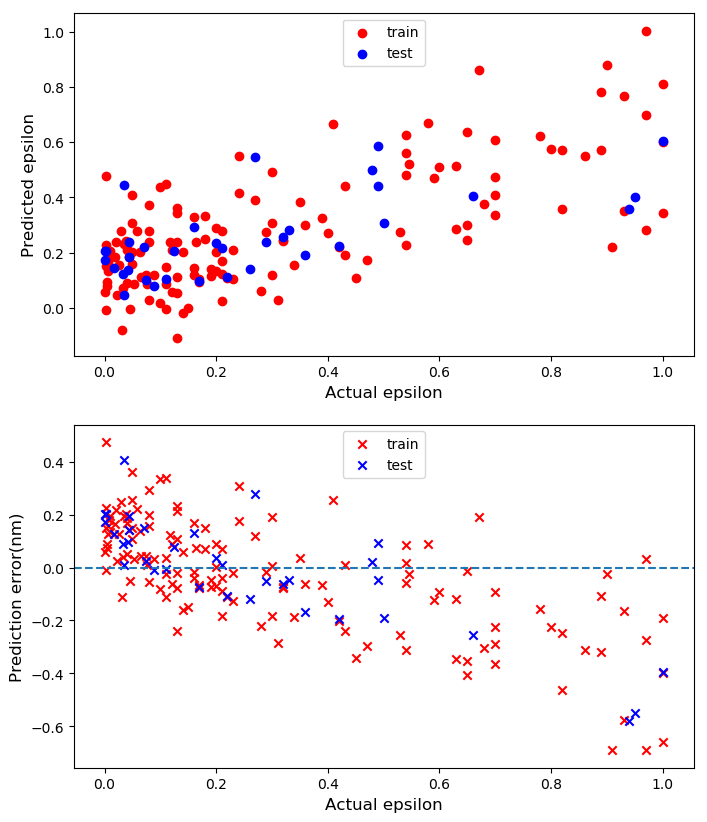

In [34]:
plot_model_error(X_train,X_test,y_train,y_test, loaded_model, None, 'epsilon')

## CNN model on the quantum yield (not good)

(array([56., 34., 20., 11., 11.,  9., 12.,  2.,  6., 12.]),
 array([4.0000e-04, 1.0036e-01, 2.0032e-01, 3.0028e-01, 4.0024e-01,
        5.0020e-01, 6.0016e-01, 7.0012e-01, 8.0008e-01, 9.0004e-01,
        1.0000e+00]),
 <a list of 10 Patch objects>)

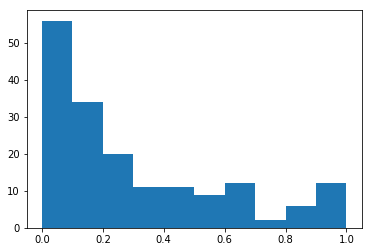

In [41]:
plt.hist(qy.tolist())

In [51]:
model = Sequential()
model.add(Embedding(len(word_map), 50, input_length=uniform_length))
model.add(BatchNormalization())
model.add(Conv1D(192,7,activation='relu'))
model.add(Dropout(0.4))
model.add(Conv1D(192,5,activation='relu'))
model.add(Dropout(0.4))

model.add(Conv1D(192,3,activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 279, 50)           2100      
_________________________________________________________________
batch_normalization_6 (Batch (None, 279, 50)           200       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 273, 192)          67392     
_________________________________________________________________
dropout_13 (Dropout)         (None, 273, 192)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 269, 192)          184512    
_________________________________________________________________
dropout_14 (Dropout)         (None, 269, 192)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 267, 192)          110784    
__________

In [52]:
callbacks_list = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-10, verbose=1, mode='auto',cooldown=0),
    ModelCheckpoint(filepath="weights.qy_cnn_best.hdf5", monitor='val_loss', save_best_only=True, verbose=1, mode='auto')    
]


In [53]:
optimizer = Adam(lr=0.000005)
lr_metric = get_lr_metric(optimizer)
model.compile(loss="mse", optimizer=optimizer, metrics=[ModelUtils.coeff_determination, lr_metric])

In [54]:
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=[X_test, y_test], callbacks=callbacks_list)

Train on 138 samples, validate on 35 samples
Epoch 1/150
138/138 [==============================] - 4s 29ms/step - loss: 0.1994 - coeff_determination: -1.6292 - lr: 5.0000e-06 - val_loss: 0.0864 - val_coeff_determination: -0.1536 - val_lr: 5.0000e-06

Epoch 00001: val_loss improved from inf to 0.08639, saving model to weights.qy_cnn_best.hdf5
Epoch 2/150
138/138 [==============================] - 1s 9ms/step - loss: 0.2252 - coeff_determination: -1.6628 - lr: 5.0000e-06 - val_loss: 0.0798 - val_coeff_determination: -0.0658 - val_lr: 5.0000e-06

Epoch 00002: val_loss improved from 0.08639 to 0.07982, saving model to weights.qy_cnn_best.hdf5
Epoch 3/150
138/138 [==============================] - 1s 9ms/step - loss: 0.1559 - coeff_determination: -1.3318 - lr: 5.0000e-06 - val_loss: 0.0823 - val_coeff_determination: -0.0999 - val_lr: 5.0000e-06

Epoch 00003: val_loss did not improve from 0.07982
Epoch 4/150
138/138 [==============================] - 1s 9ms/step - loss: 0.1653 - coeff_deter

138/138 [==============================] - 1s 9ms/step - loss: 0.1098 - coeff_determination: -0.2602 - lr: 2.5000e-06 - val_loss: 0.0935 - val_coeff_determination: -0.2518 - val_lr: 2.5000e-06

Epoch 00032: val_loss did not improve from 0.07982
Epoch 33/150
138/138 [==============================] - 1s 9ms/step - loss: 0.0991 - coeff_determination: -0.1868 - lr: 2.5000e-06 - val_loss: 0.0935 - val_coeff_determination: -0.2523 - val_lr: 2.5000e-06

Epoch 00033: val_loss did not improve from 0.07982
Epoch 34/150
138/138 [==============================] - 1s 9ms/step - loss: 0.1167 - coeff_determination: -0.3863 - lr: 2.5000e-06 - val_loss: 0.0938 - val_coeff_determination: -0.2552 - val_lr: 2.5000e-06

Epoch 00034: val_loss did not improve from 0.07982
Epoch 35/150
138/138 [==============================] - 1s 9ms/step - loss: 0.1220 - coeff_determination: -0.7371 - lr: 2.5000e-06 - val_loss: 0.0936 - val_coeff_determination: -0.2529 - val_lr: 2.5000e-06

Epoch 00035: val_loss did not im

138/138 [==============================] - 1s 10ms/step - loss: 0.1102 - coeff_determination: -0.2897 - lr: 6.2500e-07 - val_loss: 0.0994 - val_coeff_determination: -0.3319 - val_lr: 6.2500e-07

Epoch 00063: val_loss did not improve from 0.07982
Epoch 64/150
138/138 [==============================] - 1s 9ms/step - loss: 0.1030 - coeff_determination: -0.2310 - lr: 6.2500e-07 - val_loss: 0.0992 - val_coeff_determination: -0.3292 - val_lr: 6.2500e-07

Epoch 00064: val_loss did not improve from 0.07982
Epoch 65/150
138/138 [==============================] - 1s 9ms/step - loss: 0.1031 - coeff_determination: -0.3016 - lr: 6.2500e-07 - val_loss: 0.0992 - val_coeff_determination: -0.3288 - val_lr: 6.2500e-07

Epoch 00065: val_loss did not improve from 0.07982
Epoch 66/150
138/138 [==============================] - 1s 9ms/step - loss: 0.1125 - coeff_determination: -0.2753 - lr: 6.2500e-07 - val_loss: 0.0993 - val_coeff_determination: -0.3296 - val_lr: 6.2500e-07

Epoch 00066: val_loss did not i


Epoch 00094: val_loss did not improve from 0.07982
Epoch 95/150
138/138 [==============================] - 1s 9ms/step - loss: 0.1159 - coeff_determination: -0.3714 - lr: 3.1250e-07 - val_loss: 0.0976 - val_coeff_determination: -0.3076 - val_lr: 3.1250e-07

Epoch 00095: val_loss did not improve from 0.07982
Epoch 96/150
138/138 [==============================] - 1s 10ms/step - loss: 0.0967 - coeff_determination: -0.1310 - lr: 3.1250e-07 - val_loss: 0.0976 - val_coeff_determination: -0.3069 - val_lr: 3.1250e-07

Epoch 00096: val_loss did not improve from 0.07982
Epoch 97/150
138/138 [==============================] - 1s 10ms/step - loss: 0.0988 - coeff_determination: -0.1752 - lr: 3.1250e-07 - val_loss: 0.0975 - val_coeff_determination: -0.3065 - val_lr: 3.1250e-07

Epoch 00097: val_loss did not improve from 0.07982
Epoch 98/150
138/138 [==============================] - 1s 10ms/step - loss: 0.1081 - coeff_determination: -0.2358 - lr: 3.1250e-07 - val_loss: 0.0975 - val_coeff_determina


Epoch 00125: val_loss did not improve from 0.07982
Epoch 126/150
138/138 [==============================] - 1s 10ms/step - loss: 0.1046 - coeff_determination: -0.2160 - lr: 7.8125e-08 - val_loss: 0.0972 - val_coeff_determination: -0.3016 - val_lr: 7.8125e-08

Epoch 00126: val_loss did not improve from 0.07982
Epoch 127/150
138/138 [==============================] - 1s 10ms/step - loss: 0.1083 - coeff_determination: -0.2225 - lr: 7.8125e-08 - val_loss: 0.0971 - val_coeff_determination: -0.3012 - val_lr: 7.8125e-08

Epoch 00127: val_loss did not improve from 0.07982
Epoch 128/150
138/138 [==============================] - 1s 10ms/step - loss: 0.0944 - coeff_determination: -0.1526 - lr: 7.8125e-08 - val_loss: 0.0971 - val_coeff_determination: -0.3010 - val_lr: 7.8125e-08

Epoch 00128: val_loss did not improve from 0.07982
Epoch 129/150
138/138 [==============================] - 1s 10ms/step - loss: 0.1055 - coeff_determination: -0.2041 - lr: 7.8125e-08 - val_loss: 0.0971 - val_coeff_dete

## More exploration

In [44]:
tmp.head(5)

,#,Name,Epsilon,Solvent,Quantum Yield,Solvent.1,File,File.1,Absorption,SMILES,Emission
0,1,Benzene,210,cyclohexane,0.053,hexane,A01_71-43-2_Benzene.abs.txt,A01_71-43-2_Benzene.ems.txt,254.75,C1=CC=CC=C1,287.0
1,2,Toluene,2860,cyclohexane,0.170,cyclohexane,A02_108-88-3_Toluene.abs.txt,A02_108-88-3_Toluene.ems.txt,261.75,CC1=CC=CC=C1,289.5
2,3,o-Xylene,254,cyclohexane,0.170,hexane,A03_95-47-6_o-Xylene.abs.txt,A03_95-47-6_o-Xylene.ems.txt,263.00,CC1=CC=CC=C1C,291.0
3,4,m-Xylene,284,cyclohexane,0.130,hexane,A04_108-38-3_m-Xylene.abs.txt,A04_108-38-3_m-Xylene.ems.txt,265.00,CC1=CC(=CC=C1)C,290.0
4,5,p-Xylene,770,cyclohexane,0.220,hexane,A05_106-42-3_p-Xylene.abs.txt,A05_106-42-3_p-Xylene.ems.txt,275.00,CC1=CC=C(C=C1)C,291.0


In [46]:
tmp['Solvent'].unique

<bound method Series.unique of 0                cyclohexane
1                cyclohexane
2                cyclohexane
3                cyclohexane
4                cyclohexane
5                cyclohexane
6                cyclohexane
7                cyclohexane
8                cyclohexane
9                cyclohexane
10               cyclohexane
11               cyclohexane
12               cyclohexane
13                  methanol
14                   ethanol
15               cyclohexane
16               cyclohexane
17                       PBS
18               cyclohexane
19               cyclohexane
20                   ethanol
21               cyclohexane
22               cyclohexane
23                chloroform
24                   ethanol
25               cyclohexane
26               cyclohexane
27                   ethanol
28                   ethanol
29                  methanol
               ...          
261                  toluene
262                  toluene
263         

In [49]:
print(len(tmp['Name']))
print(len(set(tmp['Name'].unique())))

291
291


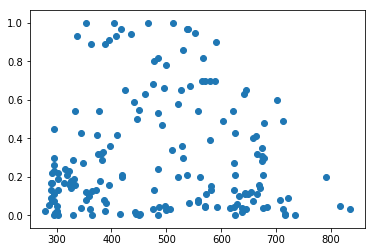

In [51]:
plt.scatter(tmp['Emission'], tmp['Quantum Yield'])

In [53]:
tmp['Solvent.1'].value_counts()

ethanol                           45
cyclohexane                       29
methanol                          14
hexane                            11
toluene                           10
benzene                            9
water                              8
acetonitrile                       6
chloroform                         5
dichloromethane                    5
ethanol (basic)                    3
dimethylformamide                  3
dioxane                            3
chloronaphthalene                  2
phosphate buffer (pH 7, 0.1 M)     2
diethyl ether                      2
tetrahydrofuran                    2
glycerol                           2
PBS                                2
water (pH 4)                       1
pyridine                           1
water (pH 10)                      1
3-methylpentane                    1
propanol                           1
water (pH 5 to 9 )                 1
30% tris buffered (in DMSO)        1
DMSO                               1
H

(array([16.,  4.,  3.,  5.,  3.,  4.,  1.,  4.,  2.,  3.]),
 array([0.0016 , 0.09644, 0.19128, 0.28612, 0.38096, 0.4758 , 0.57064,
        0.66548, 0.76032, 0.85516, 0.95   ]),
 <a list of 10 Patch objects>)

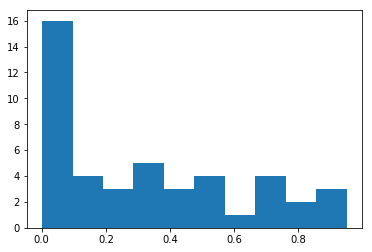

In [54]:
plt.hist(tmp.loc[tmp['Solvent.1']=='ethanol','Quantum Yield'])

(array([4., 5., 7., 2., 2., 0., 1., 0., 2., 6.]),
 array([0.0042 , 0.10378, 0.20336, 0.30294, 0.40252, 0.5021 , 0.60168,
        0.70126, 0.80084, 0.90042, 1.     ]),
 <a list of 10 Patch objects>)

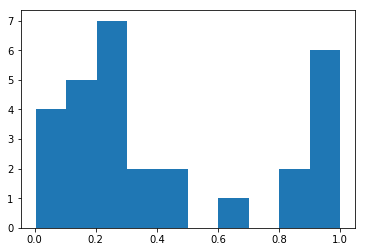

In [55]:
plt.hist(tmp.loc[tmp['Solvent.1']=='cyclohexane','Quantum Yield'])

(array([4., 1., 3., 0., 1., 1., 2., 1., 0., 1.]),
 array([0.001 , 0.0829, 0.1648, 0.2467, 0.3286, 0.4105, 0.4924, 0.5743,
        0.6562, 0.7381, 0.82  ]),
 <a list of 10 Patch objects>)

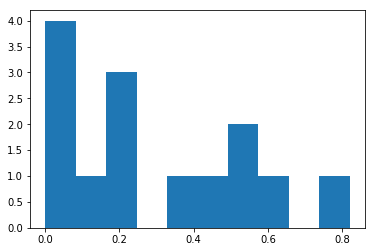

In [56]:
plt.hist(tmp.loc[tmp['Solvent.1']=='methanol','Quantum Yield'])

(array([5., 2., 1., 0., 0., 0., 0., 0., 1., 1.]),
 array([0.0019 , 0.09871, 0.19552, 0.29233, 0.38914, 0.48595, 0.58276,
        0.67957, 0.77638, 0.87319, 0.97   ]),
 <a list of 10 Patch objects>)

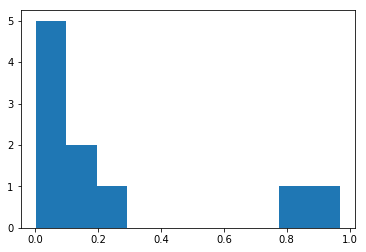

In [57]:
plt.hist(tmp.loc[tmp['Solvent.1']=='toluene','Quantum Yield'])